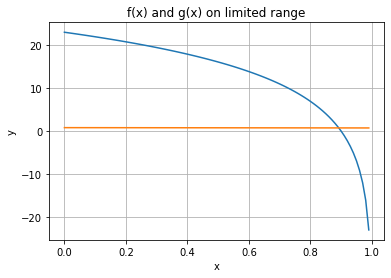

Performing 10 iterations of the 2D NR-scheme with initial guess (0.83,1):
 
Thus, the fourth steady state, to an accuracy of 16 decimal places is at
x = 0.8923342975940379 and y = 0.7386089254457343


TypeError: object of type 'int' has no len()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002598649ED08> (for post_execute):


TypeError: Cannot cast array data from dtype('<U2') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('<U2') to dtype('float64') according to the rule 'safe'

<Figure size 432x288 with 1 Axes>

In [45]:
# Part 2

#from pylab import *
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Question 1

# Have coupled system:
# 1-x-0.1*exp(0.1*y)=0 and
# 1-y-0.2*exp(0.3*x)=0, so plotting both and seeing where they are equal:

def f(x):
    return np.log((1-x)/0.1)/0.1

def g(x):
    return 1-0.2*exp(0.3*x)

# range up to 1 as x < 1 is the domain for f(x)
x = arange(0,1,0.01)

# The plot
plot(x,f(x))
plot(x,g(x))
xlabel('x')
ylabel('y')
title('f(x) and g(x) on limited range')
# Displaying the figure.
plt.grid(True)
show()

# Thus, a rough guess for the coordinates of the fourth steady state is
# (0.83, 1)


# Define this as a vector valued function:
def f(x,y):
    return array([[1-x-0.1*exp(0.1*y)],[1-y-0.2*exp(0.3*x)]])

# 2D Newton-Raphson scheme to find steady states
def J(x,y):
    return array([[-1,-0.01*exp(0.1*y)],[-0.06*exp(0.3*x),-1]])

def MultiNRroot(x,y,f,J):
    for i in range(10):
        [[x],[y]]=[[x],[y]]-np.matmul(np.linalg.inv(J(x,y)),f(x,y))
        z = [[x],[y]]
        #print("x =",str(z)[2:-24], "y=",str(z)[24:-2])
    return [[x],[y]]

print("Performing 10 iterations of the 2D NR-scheme with initial guess (0.83,1):")
r = MultiNRroot(0.83,1,f,J)
print(" ")
print("Thus, the fourth steady state, to an accuracy of 16 decimal places is at")
print("x =",str(r[0])[1:-1],"and y =",str(r[1])[1:-1])
                                                
# Question 2

# Now take the same RHS to integrate the system
def f(x,y):
    return array([x*(1-x-0.1*np.exp(0.1*y)),y*(1-y-0.2*np.exp(0.3*x))])

def fArray(x,y):
    return array([x*(np.ones(x.shape())-x-0.1*np.exp(0.1*y)), y*(np.ones(y.shape())-y-0.2*np.exp(0.3*x))])

# Fourth order RK scheme for one time step
def RK4step(x,y,t,h,f):
  k1 = h*f(x,y)
  k2 = h*f(x+k1[0]/2.0,y+k1[1]/2.0)
  k3 = h*f(x+k2[0]/2.0,y+k2[1]/2.0)
  k4 = h*f(x+k3[0],y+k3[1])
  return [x+(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6,y+(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6]

#Define the time step and number of steps to use
h=0.1
nsteps=1000

# initial conditions
x_initial = [0.1, 0.4, 0.7, 0.892, 1.1, 1.5, 2, 5, 0.05, 0.05, 0.05, 0.25, 0.892, 2, 2, 2]
y_initial = [2, 2, 2, 2, 2, 2, 2, 2, 1, 0.25, 0.05, 0.05, 0.05, 0.05, 0.5, 0.739]
t = 0

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Solving the coupled ODEs for this initial condition
for i in range(16):
    xstore = []
    ystore = []
    xstore.append(x_initial[i])
    ystore.append(y_initial[i])
    for n in range(nsteps+1):
        [x,y] = RK4step(xstore[n],ystore[n],t,h,f)
        t = t+h
        xstore.append(x)
        ystore.append(y)
    ax.plot_wireframe(xstore, ystore, np.abs(f(np.asarray(xstore), np.asarray(ystore))), 'k-')
    xlabel('x')
    ylabel('y')
    title('Phase plane plot')
    xlim(0,2)
    ylim(0,2)

#Showing steady states (0,0), (0, 0.8), (0.9, 0), (0.892, 0.739)
plot(0,0,f(0,0),color='red', marker='o', markersize=7)
plot(0,0.8,f(0,0.8),color='red', marker='o', markersize=7)
plot(0.9,0,f(0.9,0),color='red', marker='o', markersize=7)
plot(0.892,0.739,f(0.892,0.739),color='red', marker='o', markersize=7)

print("Note: The steady states are shown as red dots on the produced phase plane plot, and the trajectories are all directed inwards")